# Interpolation Using Numerical Methods

## Methods:
- Newton Interpolation (Divided Differences)
- Lagrange Interpolation
- Cubic Spline Interpolation

## Dataset:
Population data for a major city (1990–2015)

## Given Data

The following population data for a major city is provided:

- **Independent variable**: Year
- **Dependent variable**: Population

| Year | Population |
|-----|-----------|
| 1990 | 2,450,800 |
| 1995 | 2,710,500 |
| 2000 | 2,890,200 |
| 2005 | 3,150,700 |
| 2010 | 3,420,300 |
| 2015 | 3,810,600 |

In [1]:
import numpy as np           # Import the numpy library for numerical operations and array handling
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib for data visualization and plotting

In [2]:
# Given data (census years and population)

t = np.array([1990, 1995, 2000, 2005, 2010, 2015]) # Create a numpy array for the independent variable t (census years)
y = np.array([2450800, 2710500, 2890200, 3150700, 3420300, 3810600]) # Create a numpy array for the dependent variable y (city population)

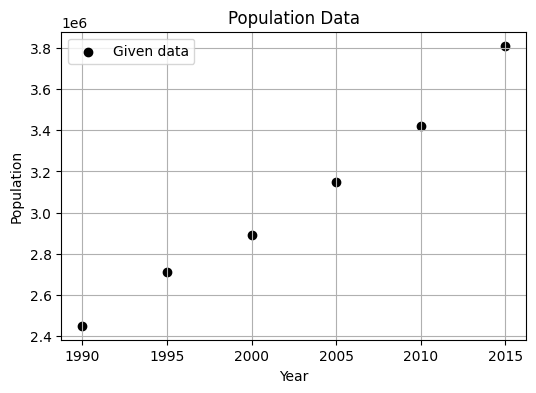

In [3]:
plt.figure(figsize=(6,4)) # Initialize a new figure object with a width of 6 inches and height of 4 inches
plt.scatter(t, y, color="black", label="Given data") # Create a scatter plot of the original data points using black markers and assign a label for the legend
plt.xlabel("Year") # Set the label for the horizontal axis (x-axis) to "Year"
plt.ylabel("Population") # Set the label for the vertical axis (y-axis) to "Population"
plt.title("Population Data") # Add a descriptive title to the top of the plot
plt.grid(True) # Enable the background grid lines to make the data points easier to read
plt.legend() # Display the legend on the plot to identify the data series based on the labels provided
plt.show() # Render the complete plot and display it on the screen

# Newton's Forward Interpolation
This method is used for interpolating values near the beginning of a dataset with equally spaced intervals. It uses the top row of the finite difference table.

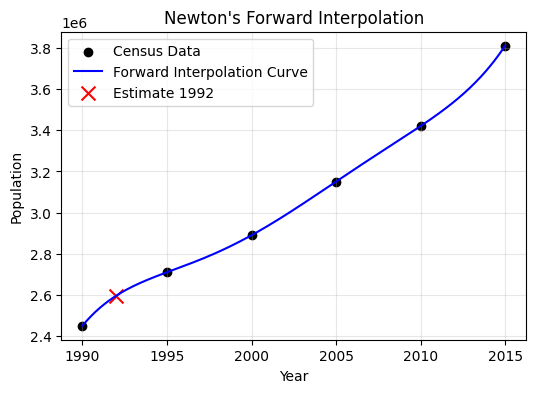

In [4]:
def forward_difference_table(y):
    n = len(y)
    table = np.zeros((n, n))
    table[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = table[i + 1, j - 1] - table[i, j - 1]
    return table

def newton_forward(t_data, diff_table, x):
    n = len(t_data)
    h = t_data[1] - t_data[0]
    q = (x - t_data[0]) / h

    result = diff_table[0, 0]
    q_product = 1.0
    factorial = 1.0

    for i in range(1, n):
        q_product *= (q - (i - 1))
        factorial *= i
        result += (diff_table[0, i] * q_product) / factorial
    return result

# --- Calculation & Plotting ---
diff_table_f = forward_difference_table(y)
t_smooth = np.linspace(t.min(), t.max(), 300)
y_forward = np.array([newton_forward(t, diff_table_f, ti) for ti in t_smooth])

plt.figure(figsize=(6, 4))
plt.scatter(t, y, color="black", label="Census Data")
plt.plot(t_smooth, y_forward, color="blue", label="Forward Interpolation Curve")
# Highlight a point in the beginning
test_year_f = 1992
plt.scatter(test_year_f, newton_forward(t, diff_table_f, test_year_f), color="red", marker='x', s=100, label=f"Estimate {test_year_f}")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Newton's Forward Interpolation")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Newton's Backward Interpolation
This method is used for interpolating values near the end of a dataset. It uses the bottom diagonal of the finite difference table and is more numerically stable for points close to the final node.

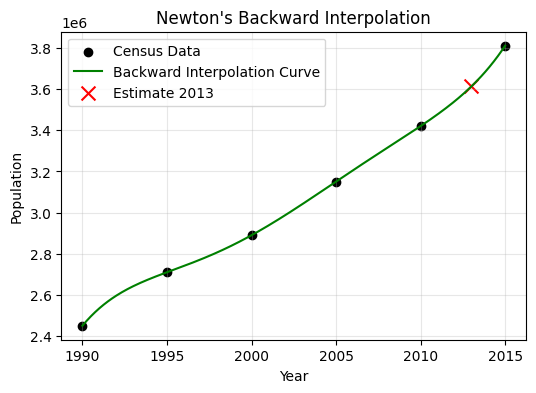

In [5]:
def backward_difference_table(y):
    n = len(y)
    table = np.zeros((n, n))
    table[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = table[i + 1, j - 1] - table[i, j - 1]
    return table

def newton_backward(t_data, diff_table, x):
    n = len(t_data)
    h = t_data[1] - t_data[0]
    q = (x - t_data[-1]) / h

    result = diff_table[n - 1, 0]
    q_product = 1.0
    factorial = 1.0

    for i in range(1, n):
        q_product *= (q + (i - 1))
        factorial *= i
        # Accessing the backward differences from the bottom-up diagonal
        result += (diff_table[n - 1 - i, i] * q_product) / factorial
    return result

# --- Calculation & Plotting ---
diff_table_b = backward_difference_table(y)
y_backward = np.array([newton_backward(t, diff_table_b, ti) for ti in t_smooth])

plt.figure(figsize=(6, 4))
plt.scatter(t, y, color="black", label="Census Data")
plt.plot(t_smooth, y_backward, color="green", label="Backward Interpolation Curve")
# Highlight a point in the end
test_year_b = 2013
plt.scatter(test_year_b, newton_backward(t, diff_table_b, test_year_b), color="red", marker='x', s=100, label=f"Estimate {test_year_b}")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Newton's Backward Interpolation")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Newton Interpolation (Divided Differences)

This method constructs an interpolating polynomial using divided differences.
The resulting polynomial passes exactly through all given data points.

In [6]:
def divided_differences(x, y): # Define a function to calculate the Newton divided differences table
    n = len(x) # Determine the number of data points to set the size of the table
    table = np.zeros((n, n)) # Initialize a square matrix of size n by n with zeros to store the differences
    table[:, 0] = y # Fill the first column of the table with the original y-values (0th order differences)

    for j in range(1, n): # Loop through each column starting from the second one (1st to (n-1)th order differences)
        for i in range(n - j): # Loop through the rows that can be calculated for the current order of difference
            # Apply the divided difference formula: (y_next - y_current) / (x_corresponding_next - x_corresponding_current)
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table # Return the complete table containing all calculated divided differences

In [7]:
def newton_polynomial(x_data, diff_table, x): # Define a function to evaluate the Newton interpolating polynomial at a specific point x
    n = len(x_data) # Get the total number of data points (degree of polynomial + 1)
    result = diff_table[0, 0] # Initialize the result with the first coefficient (f[x0], the 0th order difference)
    product = 1.0 # Initialize a variable to keep track of the product term (x - x0)(x - x1)...

    for i in range(1, n): # Loop through the remaining coefficients from the first order to the (n-1)th order
        product *= (x - x_data[i - 1]) # Update the product term by multiplying it with the next (x - x_i) factor
        result += diff_table[0, i] * product # Multiply the current divided difference by the product term and add it to the result

    return result # Return the final interpolated value for the given x

In [8]:
diff_table = divided_differences(t, y) # Call the previously defined function to compute the complete divided differences table for years (t) and population (y)

t_smooth = np.linspace(t.min(), t.max(), 300) # Generate 300 evenly spaced points between the minimum and maximum years to create a smooth curve for plotting
y_newton = np.array([newton_polynomial(t, diff_table, ti) for ti in t_smooth]) # Use a list comprehension to calculate the Newton polynomial value for each smooth time point and store the results in a numpy array

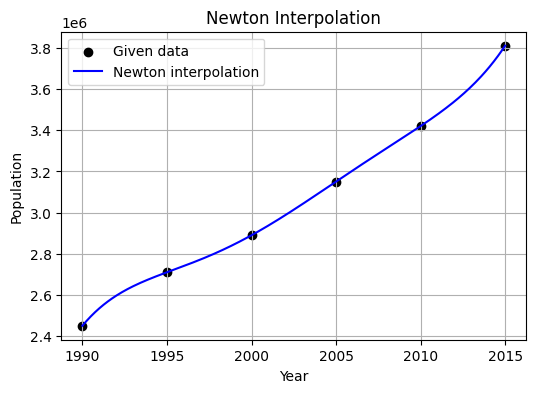

In [9]:
plt.figure(figsize=(6,4)) # Create a new figure for the plot with a specific size of 6x4 inches
plt.scatter(t, y, color="black", label="Given data") # Plot the original data points as individual black dots and label them
plt.plot(t_smooth, y_newton, color="blue", label="Newton interpolation") # Draw the continuous blue line representing the calculated Newton polynomial curve
plt.xlabel("Year") # Add the "Year" label to the horizontal x-axis
plt.ylabel("Population") # Add the "Population" label to the vertical y-axis
plt.title("Newton Interpolation") # Set the title of the graph to identify the interpolation method used
plt.grid(True) # Display a grid in the background to help visually align data points with axis values
plt.legend() # Show the legend box to distinguish between the scatter points and the fitted curve
plt.show() # Output the final graph to the screen

## Polynomial Interpolation (Degree 5)

A polynomial of degree 5 is constructed to pass exactly through all data points.
This polynomial is equivalent to the Newton and Lagrange interpolating polynomials.

In [10]:
coeff_poly = np.polyfit(t, y, 5) # Use numpy's polyfit function to calculate the coefficients of a 5th-degree polynomial that passes through the given data points (t, y)

# Create polynomial function
poly_func = np.poly1d(coeff_poly) # Create a convenient polynomial object from the calculated coefficients for evaluation and display purposes

print("Interpolating polynomial (degree 5):") # Print a descriptive text label to identify the output polynomial in the console
print(poly_func) # Display the mathematical expression of the 5th-degree interpolating polynomial

Interpolating polynomial (degree 5):
       5            4             3             2
1.109 x - 1.11e+04 x + 4.448e+07 x - 8.908e+10 x + 8.92e+13 x - 3.573e+16


In [11]:
y_poly = poly_func(t_smooth) # Evaluate the 5th-degree polynomial at each point in the smooth time array to generate the curve values

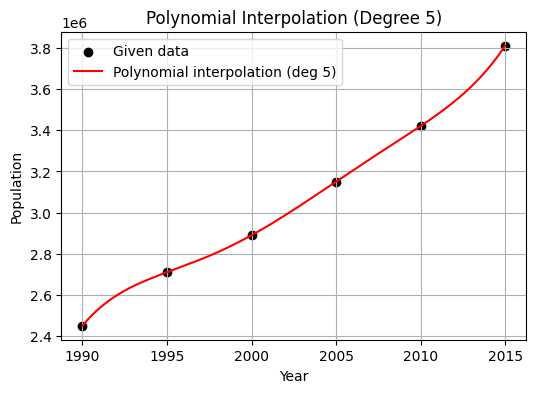

In [12]:
plt.figure(figsize=(6,4)) # Initialize a new figure object with dimensions of 6 by 4 inches
plt.scatter(t, y, color="black", label="Given data") # Plot the original census data as black points to serve as a reference
plt.plot(t_smooth, y_poly, color="red", label="Polynomial interpolation (deg 5)") # Draw the 5th-degree polynomial curve in red to show the continuous interpolation
plt.xlabel("Year") # Label the x-axis as "Year" to represent time
plt.ylabel("Population") # Label the y-axis as "Population" to represent the city's inhabitants
plt.title("Polynomial Interpolation (Degree 5)") # Set the title of the plot to reflect the method used (5th-degree polynomial)
plt.grid(True) # Turn on the background grid to assist in reading specific values from the axes
plt.legend() # Add a legend to the plot to define the markers and line styles used
plt.show() # Render and display the final plot on the screen

## Cubic Spline Interpolation

Cubic spline interpolation constructs a smooth curve composed of piecewise
cubic polynomials that pass exactly through all data points.
The spline ensures continuity of the first and second derivatives.

In [13]:
from scipy.interpolate import CubicSpline # Import the CubicSpline class from the scipy library to perform piecewise cubic interpolation

In [14]:
# Cubic spline interpolation
cs = CubicSpline(t, y) # Create a cubic spline object that fits a piecewise cubic polynomial through the data points (t, y)

# Smooth x values
t_smooth = np.linspace(t.min(), t.max(), 300) # Generate 300 points for a smooth time axis to visualize the spline curve without sharp edges

# Evaluate spline
y_spline = cs(t_smooth) # Calculate the interpolated population values for the smooth time axis using the cubic spline object

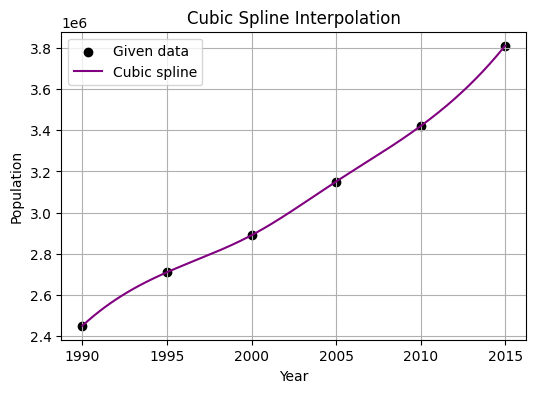

In [15]:
plt.figure(figsize=(6,4)) # Create a new figure for the plot with dimensions 6x4 inches
plt.scatter(t, y, color="black", label="Given data") # Plot the original census data as black markers to show the ground truth points
plt.plot(t_smooth, y_spline, color="purple", label="Cubic spline") # Draw the continuous purple curve representing the cubic spline interpolation
plt.xlabel("Year") # Add the "Year" label to the horizontal x-axis
plt.ylabel("Population") # Add the "Population" label to the vertical y-axis
plt.title("Cubic Spline Interpolation") # Set the title of the graph to indicate the interpolation method used
plt.grid(True) # Enable grid lines in the background to improve readability of the data coordinates
plt.legend() # Display the legend to identify the data points and the spline curve
plt.show() # Render the plot and display the final graphical output

## Verification of Interpolating Polynomials

To verify the numerical solution, we compare the Newton interpolating polynomial
with the degree-5 polynomial obtained using `numpy.polyfit`.

Since both methods construct a unique interpolating polynomial that passes
exactly through all given data points, their results should coincide.

In [16]:
# Compare Newton and polynomial interpolation
difference = np.max(np.abs(y_newton - y_poly)) # Calculate the maximum absolute difference between the Newton method and the built-in polyfit results to check for consistency

print("Maximum absolute difference between Newton and Polynomial interpolation:") # Print a header for the comparison result
print(difference) # Output the calculated difference value to the console (it should be very close to zero if both methods are correct)

Maximum absolute difference between Newton and Polynomial interpolation:
99.48982361564413


## Estimation of Population Between 1990 and 2015

Using the interpolating polynomial, we estimate the population values
for intermediate years between 1990 and 2015.

In [17]:
# Estimate population for each year between 1990 and 2015
years_est = np.arange(1990, 2016) # Create an array of integers representing every year from 1990 up to (but not including) 2016
pop_est_poly = poly_func(years_est) # Use the 5th-degree interpolating polynomial to calculate the estimated population for each of these years

for yr, pop in zip(years_est, pop_est_poly): # Iterate through pairs of years and their corresponding estimated population values
    print(f"Year {yr}: Estimated population = {int(pop)}") # Print the result for each year, converting the population value to an integer for cleaner output

Year 1990: Estimated population = 2450828
Year 1991: Estimated population = 2535284
Year 1992: Estimated population = 2596688
Year 1993: Estimated population = 2642584
Year 1994: Estimated population = 2678924
Year 1995: Estimated population = 2710532
Year 1996: Estimated population = 2741036
Year 1997: Estimated population = 2772980
Year 1998: Estimated population = 2808044
Year 1999: Estimated population = 2847028
Year 2000: Estimated population = 2890256
Year 2001: Estimated population = 2937440
Year 2002: Estimated population = 2988016
Year 2003: Estimated population = 3041080
Year 2004: Estimated population = 3095652
Year 2005: Estimated population = 3150740
Year 2006: Estimated population = 3205644
Year 2007: Estimated population = 3259780
Year 2008: Estimated population = 3313192
Year 2009: Estimated population = 3366336
Year 2010: Estimated population = 3420316
Year 2011: Estimated population = 3477224
Year 2012: Estimated population = 3540024
Year 2013: Estimated population = 

## Population Prediction for 2018 and 2025

The interpolating polynomial is used to predict the population
outside the given data range.

In [18]:
years_pred = np.array([2018, 2025]) # Define an array containing the future years for which we want to predict the population

poly_pred = poly_func(years_pred) # Use the 5th-degree interpolating polynomial to extrapolate the population for the years 2018 and 2025
spline_pred = cs(years_pred) # Use the cubic spline model to extrapolate the population for the same target years

for i, year in enumerate(years_pred): # Iterate through the target years using an index to access corresponding predictions
    print(f"Year {year}:") # Print the current prediction year
    print(f"  Polynomial prediction: {int(poly_pred[i])}") # Display the result from the polynomial model, cast to an integer
    print(f"  Cubic spline prediction: {int(spline_pred[i])}") # Display the result from the cubic spline model, cast to an integer

Year 2018:
  Polynomial prediction: 4361120
  Cubic spline prediction: 4175923
Year 2025:
  Polynomial prediction: 8811656
  Cubic spline prediction: 5657220


## Comparison of Polynomial and Cubic Spline Interpolation

Both interpolation methods pass exactly through the given data points.
However, their behavior differs between and outside the data range.

- The polynomial interpolation may exhibit oscillatory behavior,
  especially near the boundaries.
- The cubic spline interpolation provides a smoother curve with
  continuous first and second derivatives.

Overall, cubic spline interpolation is more stable and realistic
for modeling population growth.

## Effect of Using Integer-Scaled Data

To investigate numerical stability, we rescale the data:
- Years are measured as years since 1990
- Population is measured in millions

In [19]:
# Integer-scaled data
t_int = np.array([0, 5, 10, 15, 20, 25]) # Create a new array for years scaled relative to 1990 (where 0 represents the year 1990)
y_int = np.array([2.4508, 2.7105, 2.8902, 3.1507, 3.4203, 3.8106]) # Define the population data scaled in millions (dividing original values by 1,000,000)

coeff_poly_int = np.polyfit(t_int, y_int, 5) # Calculate the coefficients of a 5th-degree polynomial using the simplified, integer-scaled data to improve numerical stability
poly_int = np.poly1d(coeff_poly_int) # Create a polynomial object from the new coefficients for evaluation and display

print("Polynomial with integer-scaled data:") # Print a header to describe the output that follows
print(poly_int) # Output the algebraic form of the polynomial based on the scaled variables

Polynomial with integer-scaled data:
           5             4           3           2
1.109e-06 x - 7.094e-05 x + 0.00165 x - 0.01601 x + 0.09892 x + 2.451


Rescaling the variables improves numerical stability and results
in smaller polynomial coefficients while preserving the shape
of the interpolating curve.

## Effect of Integer Scaling on Interpolation Results

In [20]:
# Scale variables
t_scaled = np.array([0, 5, 10, 15, 20, 25]) # Create a numpy array representing the time elapsed since 1990 (offsetting the years to start from 0)
y_scaled = np.array([2.4508, 2.7105, 2.8902,
                     3.1507, 3.4203, 3.8106]) # Create a numpy array for population values scaled to millions for easier numerical handling

# Polynomial interpolation on scaled data
coeff_scaled = np.polyfit(t_scaled, y_scaled, 5) # Determine the coefficients of a 5th-degree polynomial using the newly scaled datasets
poly_scaled = np.poly1d(coeff_scaled) # Generate a polynomial object from the coefficients to easily perform evaluations and formatting

print("Interpolating polynomial with scaled variables:") # Print a descriptive heading for the scaled polynomial output
print(poly_scaled) # Display the mathematical expression of the polynomial based on the scaled x and y values

Interpolating polynomial with scaled variables:
           5             4           3           2
1.109e-06 x - 7.094e-05 x + 0.00165 x - 0.01601 x + 0.09892 x + 2.451


Using scaled variables significantly reduces the magnitude of coefficients,
improves numerical stability, and makes the interpolating polynomial easier
to interpret. This scaling is especially important in numerical methods
to avoid round-off errors and ill-conditioned computations.